In [ ]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py

In [ ]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [ ]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ddpg, TBP, zs_ddpg, models, zs_models')

from Zero_Sum_DDPG import setup_logger_kwargs, MLPActorCritic, DG_DDPG
from DDPG import DDPG
import TBP
from TBP import ThreeBodyEnv

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Zero_Sum_DDPG.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cuda.pth already exists.
model/q_cuda.pth already exists.
Directory 'model_zs' already exists and is not empty.
model_zs/actor_cuda.pth already exists.
model_zs/q_cuda.pth already exists.
model_zs/q_2_cuda.pth already exists.
model_zs/actor_2_cuda.pth already exists.


In [ ]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [ ]:
# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

Logging data to /content/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/content/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<Zero_Sum_DDPG.DG_DDPG object at 0x7bbdeddf6750>":	{
            "ac":	{
                "MLPActorCritic(\n  (pi): MLPActor(\n    (pi): Sequential(\n      (0): Linear(in_features=4, out_features

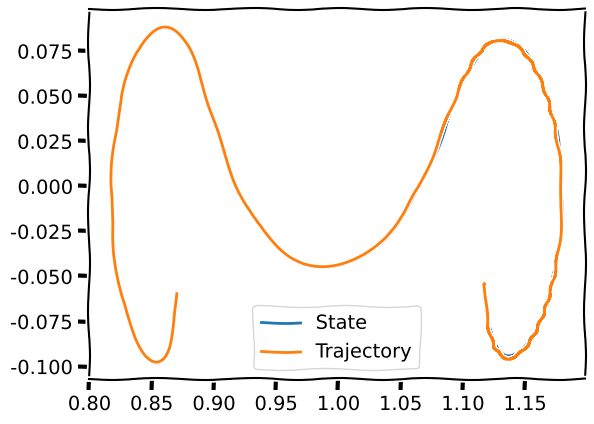

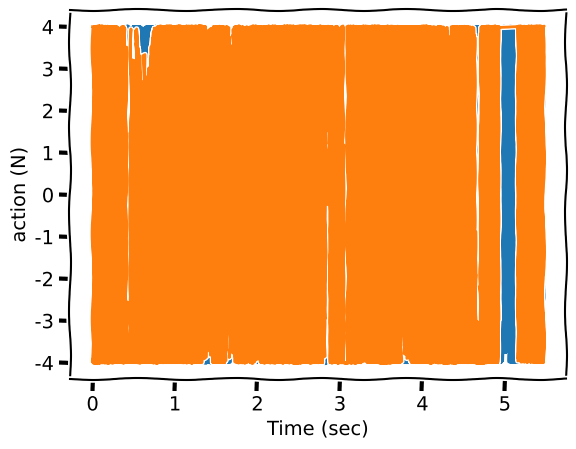

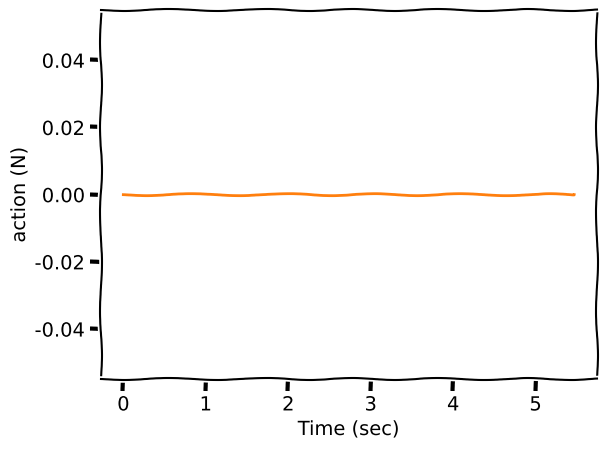

In [ ]:
ddpg_zs = DG_DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000,
    first_player_epoch=50
)

ddpg_zs.load(filepath='model_zs/', from_device_to_load='cuda')
ddpg_zs.test(fun_mode=True)
ddpg_zs.env.second_player = False

Logging data to /content/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/content/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x7bbdedea14d0>":	{
            "ac":	{
                "MLPActorCritic(\n  (pi): MLPActor(\n    (pi): Sequential(\n      (0): Linear(in_features=4, out_features=32, bias=True)\n      (1): Tanh()\n    

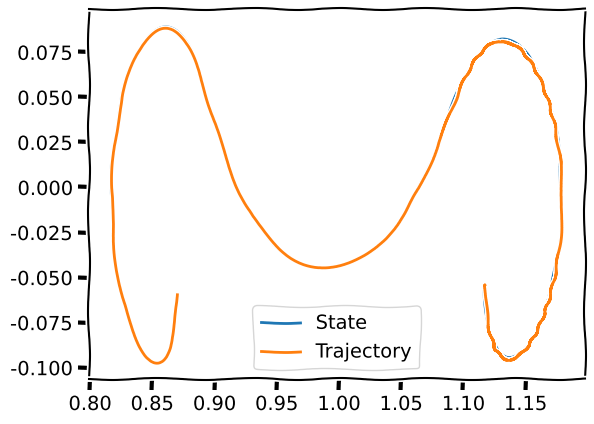

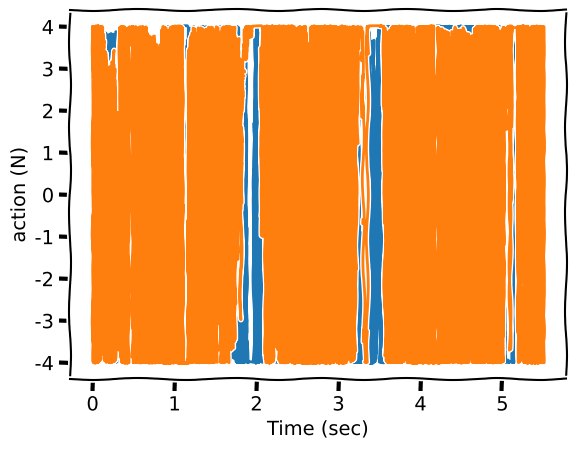

In [ ]:
ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

In [ ]:
class SensorNoiseWrapper(gym.Wrapper):
    """
    Gymnasium environment wrapper that adds Gaussian sensor noise to observations.
    This wrapper supports the new Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, noise_std=0.05):
        super(SensorNoiseWrapper, self).__init__(env)
        self.noise_std = noise_std

    def reset(self, **kwargs):
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
            return self._add_noise(obs), info
        else:
            return self._add_noise(result)

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        return self._add_noise(obs), reward, terminated, truncated, info

    def _add_noise(self, observation):
        observation = np.array(observation)
        noise = np.random.normal(0, self.noise_std, size=observation.shape)
        return observation + noise


def make_env_sensor_noise(error_range=0.01, final_range=0.001, noise_std=0.05):
    """
    Creates the ThreeBodyEnv wrapped with sensor noise for Gymnasium.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return SensorNoiseWrapper(env, noise_std=noise_std)


In [ ]:
def run_episode(agent, env_fn, max_steps=10000):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Returns:
        total_reward: Sum of rewards collected in the episode.
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        # Assume the agent provides an 'act' method to select actions
        action = agent.get_action(obs, 0)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Determine if the episode is done
        total_reward += reward
        steps += 1

    env.close()
    return total_reward


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards.

    Returns:
        returns: List of cumulative rewards from each episode.
    """
    returns = []
    for i in range(num_episodes):
        ret = run_episode(agent, env_fn, max_steps)
        returns.append(ret)
        print(f"{i} of {num_episodes}")
    return returns


Streaming output truncated to the last 5000 lines.
done 🥺
second player was in the game
334 of 1000
done 🥺
second player was in the game
335 of 1000
done 🥺
second player was in the game
336 of 1000
done 🥺
second player was in the game
337 of 1000
done 🥺
second player was in the game
338 of 1000
done 🥺
second player was in the game
339 of 1000
done 🥺
second player was in the game
340 of 1000
done 🥺
second player was in the game
341 of 1000
done 🥺
second player was in the game
342 of 1000
done 🥺
second player was in the game
343 of 1000
done 🥺
second player was in the game
344 of 1000
done 🥺
second player was in the game
345 of 1000
done 🥺
second player was in the game
346 of 1000
done 🥺
second player was in the game
347 of 1000
done 🥺
second player was in the game
348 of 1000
done 🥺
second player was in the game
349 of 1000
done 🥺
second player was in the game
350 of 1000
done 🥺
second player was in the game
351 of 1000
done 🥺
second player was in the game
352 of 1000
done 🥺
second play

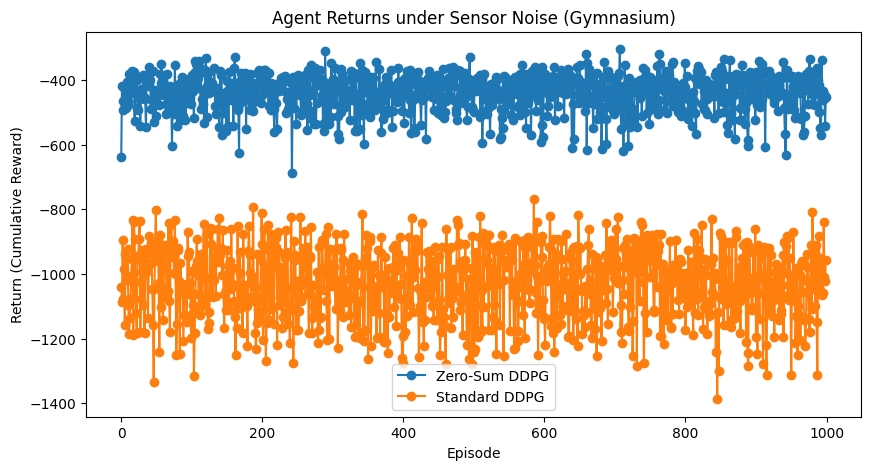

In [71]:
# Update the agents' environment function to use sensor noise
ddpg_zs.env_fn = lambda: make_env_sensor_noise(noise_std=0.5)
ddpg.env_fn = lambda: make_env_sensor_noise(noise_std=0.5)

# Number of episodes for evaluation
num_episodes = 1000

# Evaluate the Zero-Sum DDPG and Standard DDPG agents
returns_zs = evaluate_agent(ddpg_zs, ddpg_zs.env_fn, num_episodes=num_episodes)
returns_std = evaluate_agent(ddpg, ddpg.env_fn, num_episodes=num_episodes)

# Calculate and print average returns
avg_return_zs = np.mean(returns_zs)
avg_return_std = np.mean(returns_std)

print("Zero-Sum DDPG Average Return:", avg_return_zs)
print("Standard DDPG Average Return:", avg_return_std)

# Plot the returns for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(returns_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(returns_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title('Agent Returns under Sensor Noise (Gymnasium)')
plt.legend()
plt.show()


<ipython-input-72-e59ee53f8353>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


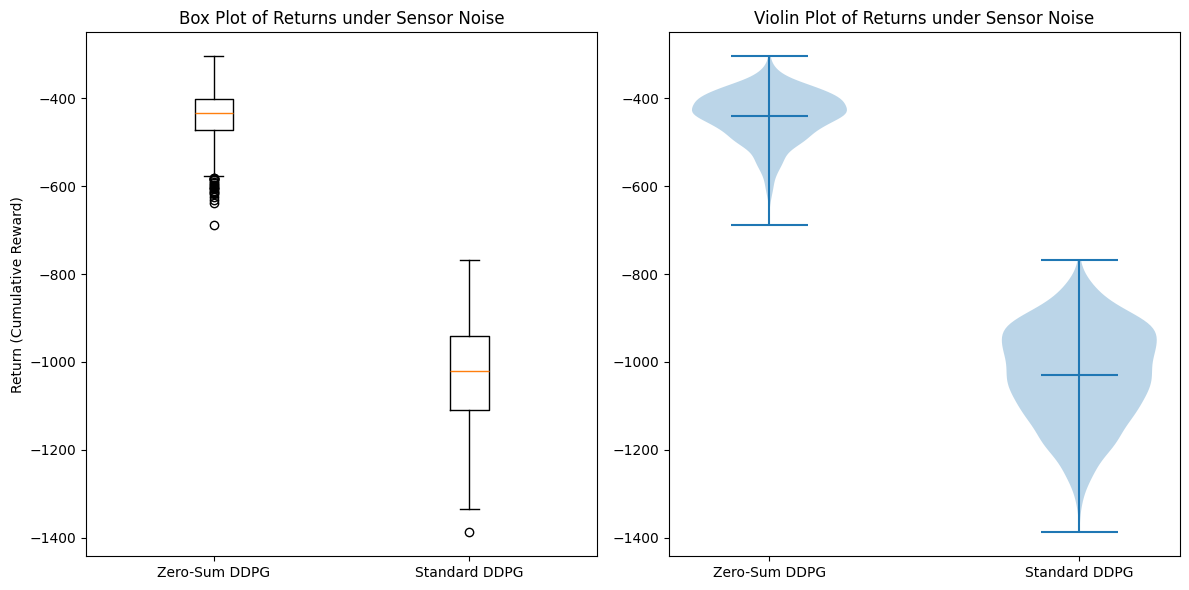

In [72]:
# Assume returns_zs and returns_std are lists of cumulative rewards from multiple episodes
data = [returns_zs, returns_std]

# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()


In [73]:
# Save the evaluation data to a CSV file
rows = []
for ret in returns_zs:
    rows.append({'Agent': 'Zero-Sum DDPG', 'Return': ret})
for ret in returns_std:
    rows.append({'Agent': 'Standard DDPG', 'Return': ret})

df = pd.DataFrame(rows)
csv_filename = "evaluation_returns.csv"
df.to_csv(csv_filename, index=False)
print(f"Evaluation data saved to {csv_filename}")

Evaluation data saved to evaluation_returns.csv
